In [1]:
import pickle
import numpy as np
data_dir = "/common/home/dm1487/robotics_research/ktamp/namo/region_opening_data/modular_data_less/less_env_000078"

# region_opening_data/modular_data_less/less_env_000077/

In [2]:
data = np.load(data_dir + "/less_env_000078_episode_0_neighbour_0_goal_step_0.npz")

In [3]:
data['xml_file']

array(['../ml4kp_ktamp/resources/models/custom_walled_envs/aug9/medium/set1/benchmark_1/env_config_105c.xml'],
      dtype='<U99')

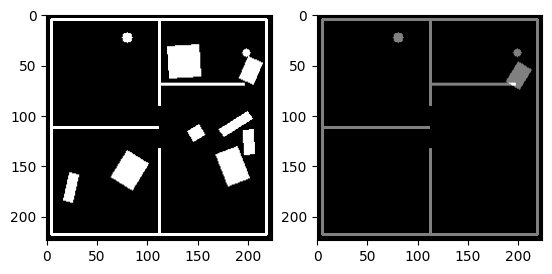

In [4]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2)

axes[0].imshow(data['static'] + data['movable'] + data['robot'] + data['goal'], cmap='gray')
axes[1].imshow(data['static'] + data['robot'] + data['goal'] + data['target_goal'], cmap='gray')


In [42]:
list(data.keys())

['robot',
 'goal',
 'movable',
 'static',
 'reachable',
 'target_object',
 'target_goal',
 'robot_distance',
 'goal_distance',
 'episode_id',
 'task_id',
 'algorithm',
 'solution_depth',
 'search_time_ms',
 'nodes_expanded',
 'robot_goal',
 'xml_file',
 'action_object_ids',
 'action_targets']